# **Project Simple ETL with Pandas**

## **Pengantar**

Di masa pandemi, kompetisi coding seperti Competitive Programming maupun Hackathon banyak diselenggarakan karena sangat memungkinkan untuk dilakukan secara online.

**Hackathon** merupakan kompetisi membuat perangkat lunak (software) yang dilaksanakan secara marathon yang biasanya diikuti secara tim. Umumnya, peserta hackathon diminta untuk mengembangkan platform (mobile, web, desktop, dll.) dalam kurun waktu tertentu untuk menyelesaikan permasalahan yang sudah ditetapkan/didefinisikan oleh penyelenggara ataupun berdasarkan tema yang dipilih oleh tim tersebut.

Untuk bisa mengikuti hackathon dari suatu instansi, calon peserta diwajibkan untuk mendaftarkan diri mereka pada situs/form tertentu dengan memasukkan beberapa informasi yang diminta oleh penyelenggara.

**Extract, Transform, and Load (ETL)** merupakan kumpulan proses untuk 'memindahkan' data dari satu tempat ke tempat lain. Tempat yang dimaksud adalah dari sumber data (bisa berupa database aplikasi, file, logs, database dari 3rd party, dan lainnya) ke data warehouse.

Data warehouse merupakan database yang berisi data-data (tabel-tabel) yang sudah siap untuk dilakukan analisis oleh Data Analyst maupun Data Scientist.

Lebih lengkapnya bisa dilihat di: [https://en.wikipedia.org/wiki/Data_warehouse]


### **Project yang Akan Dikerjakan**

Data pendaftar hackathon yang diselenggarakan oleh DQLab bernama DQThon.
Dataset ini terdiri dari 5000 baris data (5000 pendaftar) dengan format CSV (Comma-separated values) dan memiliki beberapa kolom diantaranya:
1.	participant_id 	:	ID dari peserta/partisipan hackathon (unique value)	
2.	first_name	:	nama depan peserta
3.	last_name	:	nama belakang peserta
4.	birth_date	:	tanggal lahir peserta
5.	address	:	alamat tempat tinggal peserta
6.	phone_number	:	nomor hp/telepon peserta
7.	country	:	negara asal peserta
8.	institute	:	institusi peserta saat ini (nama perusahaan atau nama universitas)
9.	occupation	:	pekerjaan peserta saat ini
10.	register_time	:	waktu peserta melakukan pendaftaran hackathon dalam detik


**Tujuan** : Menghasilkan beberapa kolom dengan memanfaatkan kolom-kolom yang ada, sehingga akhir dari proyek ini berupa hasil transformasi data dengan beberapa kolom baru selain dari 10 kolom diatas.

## **Transform Data**

### **Extract**

Extract merupakan proses meng-ekstraksi data dari sumber, sumber data ini bisa berupa relational data (SQL) atau tabel, nonrelational (NoSQL) maupun yang lainnya.

Dataset akan dibaca terlebih dahulu sebagai CSV agar nantinya bisa diolah. 

File tersebut bisa diakses melalui URL: https://storage.googleapis.com/dqlab-dataset/dqthon-participants.csv.


In [ ]:
import pandas as pd
df_participant = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqthon-participants.csv')

In [ ]:
print("Dataframe 5 teratas:\n", df_participant.head())

Dataframe 5 teratas:
                          participant_id first_name   last_name   birth_date  \
0  bd9b6f88-b84f-4c4d-90f8-b67fe2f1a29a      Citra  Nurdiyanti  05 Feb 1991   
1  7dfe3391-6f40-47b6-b4db-0c76ebaf5fc3       Aris    Setiawan  11 Jan 1993   
2  19582d7f-b824-4fe5-a517-d5bf573fc768   Cornelia   Handayani  31 Jul 1993   
3  aeb6d817-25f3-4867-8a74-8d92e0a0f633      Soleh      Rajasa  04 Nov 1991   
4  1fdabdd9-5444-4c97-87b2-fe8833ad0d27       Vivi      Astuti  22 Jan 2003   

                                             address        phone_number  \
0           Gg. Monginsidi No. 08\nMedan, Aceh 80734     (0151) 081 2706   
1     Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434  +62 (036) 461 7027   
2             Jalan Kebonjati No. 0\nAmbon, SS 57739        089 833 6695   
3    Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156  +62 (418) 329-4756   
4  Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...          0812511835   

       country                  institute     

### **Transform**

Transform merupakan proses melakukan transformasi data, atau perubahan terhadap data. Umumnya seperti:
1. Merubah nilai dari suatu kolom ke nilai baru.
2. Menciptakan kolom baru dengan memanfaatkan kolom lain.
3. Transpose baris menjadi kolom (atau sebaliknya).
4. Mengubah format data ke bentuk yang lebih standard (contohnya, kolom date, maupun datetime yang biasanya memiliki nilai yang tidak standard maupun nomor HP yang biasanya memiliki nilai yang tidak sesuai format standardnya), dan lainnya.


### **Transform Bagian I - Kode Pos**

Ada permintaan datang dari tim logistik bahwa mereka membutuhkan kode pos dari peserta agar pengiriman piala lebih mudah dan cepat sampai. Maka dari itu akan dibuat kolom baru bernama postal_code yang memuat informasi mengenai kode pos yang diambil dari alamat peserta (kolom address).

Diketahui bahwa kode pos berada di paling akhir dari alamat tersebut.

Note: 
Jika regex yang dimasukkan tidak bisa menangkap pattern dari value kolom address maka akan menghasilkan NaN.

In [ ]:
print(df_participant['address'].head())

0             Gg. Monginsidi No. 08\nMedan, Aceh 80734
1       Gg. Rajawali Timur No. 7\nPrabumulih, MA 09434
2               Jalan Kebonjati No. 0\nAmbon, SS 57739
3      Jl. Yos Sudarso No. 109\nLubuklinggau, SR 76156
4    Jalan Gardujati No. 53\nKediri, Sulawesi Tenga...
Name: address, dtype: object


In [ ]:
#print(df_participant['address'].head())
df_participant['postal_code'] = df_participant['address'].str.extract(r'(\d+)$') #Masukkan regex Anda didalam fungsi extract
#print(df_participant['postal_code'].head())

In [ ]:
print(df_participant['postal_code'].head())

0    80734
1    09434
2    57739
3    76156
4    70074
Name: postal_code, dtype: object


### **Transform Bagian II - Kota**

Selain kode pos, tim logistik juga membutuhkan kota dari peserta.

Untuk menyediakan informasi tersebut, akan dibuat kolom baru bernama city yang didapat dari kolom address. Diasumsikan bahwa kota merupakan sekumpulan karakter yang terdapat setelah nomor jalan diikuti dengan `\n` (newline character) atau dalam bahasa lainnya yaitu enter.


In [ ]:
#Masukkan regex Anda didalam fungsi extract
df_participant['city'] = df_participant['address'].str.extract(r'(?<=\n)(\w.+)(?=,)') 
#print(df_participant['city'].head())

In [ ]:
print(df_participant['city'].head())

0           Medan
1      Prabumulih
2           Ambon
3    Lubuklinggau
4          Kediri
Name: city, dtype: object


### **Transform Bagian III - Github**

Salah satu parameter untuk mengetahui proyek apa saja yang pernah dikerjakan oleh peserta yaitu dari git repository mereka.

Pada kasus ini kita menggunakan profil github sebagai parameternya. Akan dibuat kolom baru bernama github_profile yang merupakan link profil github dari peserta.

Diketahui bahwa profil github mereka merupakan gabungan dari first_name dan last_name yang sudah di-lowercase.


In [ ]:
df_participant['github_profile'] = 'https://github.com/' + df_participant['first_name'].str.lower() + df_participant['last_name'].str.lower()
#print(df_participant['github_profile'].head())

In [ ]:
print(df_participant['github_profile'].head())

0      https://github.com/citranurdiyanti
1         https://github.com/arissetiawan
2    https://github.com/corneliahandayani
3          https://github.com/solehrajasa
4           https://github.com/viviastuti
Name: github_profile, dtype: object


### **Transform Bagian IV - Nomor Handphone** 

Jika dilihat kembali, nomor handphone yang ada pada data csv memiliki format yang berbeda-beda. Maka dari itu, perlu untuk melakukan cleansing pada data nomor handphone agar memiliki format yang sama. 

Pada kasus ini mari samakan formatnya dengan aturan:
1. Jika awalan nomor HP berupa angka 62 atau +62 yang merupakan kode telepon Indonesia, diterjemahkan ke 0.
2. Tidak ada tanda baca seperti kurung buka, kurung tutup, strip.
3. Tidak ada spasi pada nomor HP nama kolom untuk menyimpan hasil cleansing pada nomor HP yaitu cleaned_phone_number.


In [ ]:
print(df_participant['phone_number'].head())

0       (0151) 081 2706
1    +62 (036) 461 7027
2          089 833 6695
3    +62 (418) 329-4756
4            0812511835
Name: phone_number, dtype: object


In [ ]:
#print(df_participant['phone_number'].head())
#Masukkan regex anda pada parameter pertama dari fungsi replace
df_participant['cleaned_phone_number'] = df_participant['phone_number'].str.replace(r'^(\+62|62)', '0')
df_participant['cleaned_phone_number'] = df_participant['cleaned_phone_number'].str.replace(r'[()-]', '')
df_participant['cleaned_phone_number'] = df_participant['cleaned_phone_number'].str.replace(r'\s+', '')
#print(df_participant['cleaned_phone_number'].head())

<ipython-input-27-82235299f2b2>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_participant['cleaned_phone_number'] = df_participant['phone_number'].str.replace(r'^(\+62|62)', '0')
<ipython-input-27-82235299f2b2>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df_participant['cleaned_phone_number'] = df_participant['cleaned_phone_number'].str.replace(r'[()-]', '')
<ipython-input-27-82235299f2b2>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_participant['cleaned_phone_number'] = df_participant['cleaned_phone_number'].str.replace(r'\s+', '')


In [ ]:
print(df_participant['cleaned_phone_number'].head())

0    01510812706
1    00364617027
2     0898336695
3    04183294756
4     0812511835
Name: cleaned_phone_number, dtype: object


### **Transform Bagian V - Nama Tim**

Dataset saat ini belum memuat nama tim, dan rupanya dari tim Data Analyst membutuhkan informasi terkait nama tim dari masing-masing peserta.

Diketahui bahwa nama tim merupakan gabungan nilai dari kolom first_name, last_name, country, dan institute.

Akan dibuat kolom baru dengan nama team_name yang memuat informasi nama tim dari peserta.


In [ ]:
def func(col):
    abbrev_name = "%s%s"%(col['first_name'][0],col['last_name'][0]) #Singkatan dari Nama Depan dan Nama Belakang dengan mengambil huruf pertama
    country = col['country']
    abbrev_institute = '%s'%(''.join(list(map(lambda word: word[0], col['institute'].split())))) #Singkatan dari value di kolom institute
    return "%s-%s-%s"%(abbrev_name,country,abbrev_institute)

df_participant['team_name'] = df_participant.apply(func, axis=1)
#print(df_participant['team_name'].head())

In [ ]:
print(df_participant['team_name'].head())

0       CN-Georgia-UPM
1    AS-Korea Utara-UD
2        CH-Komoro-UHP
3       SR-Eritrea-PTY
4      VA-Aljazair-PHR
Name: team_name, dtype: object


### **Transform Bagian VI - Email**

Setelah dilihat kembali dari data peserta yang dimiliki, ternyata ada satu informasi yang penting namun belum tersedia, yaitu email.

Pada kasus ini akan ditentukan aturan bahwa format email sebagai berikut:

Format email:

xxyy@aa.bb.[ac/com].[cc]

Keterangan:
- xx -> nama depan (first_name) dalam lowercase
- yy -> nama belakang (last_name) dalam lowercase
- aa -> nama institusi

Untuk nilai bb dan cc mengikuti nilai aa. Aturannya:
- Jika institusi merupakan Universitas, 
bb -> gabungan dari huruf pertama pada setiap kata dari nama Universitas dalam lowercase.
Kemudian diikuti dengan .ac yang menandakan akademi/institusi belajar dan pattern cc.
- Jika institusi bukan merupakan Universitas, 
bb -> gabungan dari huruf pertama pada setiap kata dari nama Universitas dalam lowercase.
Kemudian diikuti dengan .com. Perlu diketahui bahwa pattern cc tidak berlaku pada kondisi ini.

cc -> negara asal peserta, adapun aturannya:
- Jika banyaknya kata pada negara lebih dari satu ambil singkatan dari negara tersebut dalam lowercase
- Jika banyaknya kata hanya satu ambil tiga huruf terdepan dari dari negara tersebut dalam lowercase

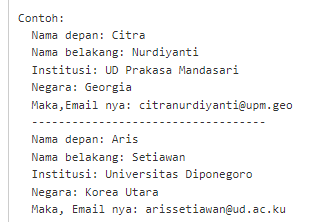

In [ ]:
def func(col):
    first_name_lower = col['first_name'].lower()
    last_name_lower = col['last_name'].lower()
    institute = ''.join(list(map(lambda word: word[0], col['institute'].lower().split()))) #Singkatan dari nama perusahaan dalam lowercase

    if 'Universitas' in col['institute']:
        if len(col['country'].split()) > 1: #Kondisi untuk mengecek apakah jumlah kata dari country lebih dari 1
            country = ''.join(list(map(lambda word: word[0], col['country'].lower().split())))
        else:
            country = col['country'][:3].lower()
        return "%s%s@%s.ac.%s"%(first_name_lower,last_name_lower,institute,country)

    return "%s%s@%s.com"%(first_name_lower,last_name_lower,institute)

df_participant['email'] = df_participant.apply(func, axis=1)
#print(df_participant['email'].head())

In [ ]:
print(df_participant['email'].head())

0      citranurdiyanti@upm.com
1        arissetiawan@ud.ac.ku
2    corneliahandayani@uhp.com
3          solehrajasa@pty.com
4           viviastuti@phr.com
Name: email, dtype: object


### **Transform Bagian VII - Tanggal Lahir**

MySQL merupakan salah satu database yang sangat populer dan digunakan untuk menyimpan data berupa tabel, termasuk data hasil pengolahan ini nantinya bisa dimasukkan ke MySQL.

Meskipun begitu, ada suatu aturan dari MySQL terkait format tanggal yang bisa diterima yaitu YYYY-MM-DD dengan keterangan:
- YYYY: 4 digit yang menandakan tahun
- MM: 2 digit yang menandakan bulan
- DD: 2 digit yang menandakan tanggal

Contohnya yaitu: 2021-04-07

Perhatikan kolom tanggal lahir terlihat bahwa nilainya belum sesuai dengan format DATE dari MySQL.

Lihat lebih detail : https://www.mysqltutorial.org/mysql-date/

Oleh karena itu, akan dilakukan formatting terhadap kolom birth_date menjadi YYYY-MM-DD dan disimpan di kolom yang sama.


In [ ]:
df_participant['birth_date'] = pd.to_datetime(df_participant['birth_date'], format='%d %b %Y')
#print(df_participant['birth_date'].head())

In [ ]:
print(df_participant['birth_date'].head())

0   1991-02-05
1   1993-01-11
2   1993-07-31
3   1991-11-04
4   2003-01-22
Name: birth_date, dtype: datetime64[ns]


### **Transform Bagian VIII - Tanggal Daftar Kompetisi**

Selain punya aturan mengenai format DATE, MySQL juga memberi aturan pada data yang bertipe DATETIME yaitu YYYY-MM-DD HH:mm:ss dengan keterangan:
- YYYY: 4 digit yang menandakan tahun
- MM: 2 digit yang menandakan bulan
- DD: 2 digit yang menandakan tanggal
- HH: 2 digit yang menandakan jam
- mm: 2 digit yang menandakan menit
- ss: 2 digit yang menandakan detik

Contohnya yaitu: 2021-04-07 15:10:55

Karena data mengenai waktu registrasi peserta (register_time) belum sesuai format yang seharusnya, maka kolom register_time akan diformat DATETIME sesuai dengan aturan dari MySQL.

Hasil akan disimpan ke kolom register_at.


In [ ]:
df_participant['register_at'] = pd.to_datetime(df_participant['register_time'], unit='s')
#print(df_participant['register_at'].head())

In [ ]:
print(df_participant['register_at'].head())

0   2021-04-05 14:47:26
1   2021-04-05 14:46:58
2   2021-04-05 14:47:15
3   2021-04-05 14:47:14
4   2021-04-05 14:46:50
Name: register_at, dtype: datetime64[ns]


### **Kesimpulan**

Dataset terbaru sudah berbeda dengan saat proses extract sebelumnya. Ada beberapa kolom tambahan yang memanfaatkan nilai kolom lain.

Dataset saat ini memuat kolom:
1.	participant_id 	:	ID dari peserta/partisipan hackathon (unique value)	
2.	first_name	:	nama depan peserta
3.	last_name	:	nama belakang peserta
4.	birth_date	:	tanggal lahir peserta (format YYYY-MM-DD)
5.	address	:	alamat tempat tinggal peserta
6.	phone_number	:	nomor hp/telepon peserta
7.	country	:	negara asal peserta
8.	institute	:	institusi peserta saat ini (nama perusahaan atau nama universitas)
9.	occupation	:	pekerjaan peserta saat ini
10.	register_time	:	waktu peserta melakukan pendaftaran hackathon dalam detik
11.	team_name 	:	nama tim peserta (gabungan nama depan, nama belakang, negara, dan institusi)
12.	postal_code	:	kode pos alamat peserta (diambil dari kolom alamat)
13.	city	:	kota peserta (diambil dari kolom alamat)
14.	github_profile	:	link profil github peserta (gabungan nama depan dan nama belakang)
15.	email	:	alamat email peserta (gabungan nama depan, nama belakang, institusi, dan negara)
16.	cleaned_phone_number	:	nomor hp/telepon peserta (format lebih baik)
17.	register_at	:	tanggal dan waktu peserta melakukan pendaftaran (format DATETIME)


### **Load**

Pada bagian load ini, data yang sudah ditransformasi sedemikian rupa sehingga sesuai dengan kebutuhan tim analyst dimasukkan kembali ke database yaitu Data Warehouse (DWH). Biasanya, dilakukan pendefinisian skema database terlebih dahulu seperti:
1.	Nama kolom
2.	Tipe kolom
3.	Apakah primary key, unique key, index atau bukan
4.	Panjang kolomnya

Karena umumnya Data Warehouse merupakan database yang terstruktur sehingga mereka memerlukan skema sebelum datanya dimasukkan.

Pandas sudah menyediakan fungsi untuk memasukkan data ke database yaitu to_sql().

Detail dari fungsi tersebut bisa dilihat pada dokumentasi Pandas: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html
